In [7]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

from scipy.stats import norm

%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

# Delta ($\triangle$)

## $\frac{\partial C}{\partial S_0} = \Phi(d_1) = \Phi(\frac {log(\frac{S_0}{K}) + (r+\frac{\sigma^2}{2})T}{\sigma \sqrt{T}})$

- We can make use of the Put-Call Parity to derive the $\triangle$ for a European put  

Recall that C - P = $S_0 - Ke^{-rT}$  

$\implies \frac{\partial C}{\partial S_0} - \frac{\partial P}{\partial S_0} = 1$  
## $\implies \frac{\partial P}{\partial S_0} = \Phi(d_1) - 1 \hspace{0.3cm} \equiv \hspace{0.3cm} \triangle_{put} = \triangle_{call} - 1$

In [6]:
S, sigma, r, K = np.linspace(0, 100, 100), 0.2, 0.5/100, 50

In [8]:
class Delta:
    def __init__(self, S, K, r, sigma, T, optType):
        self.S = S
        self.K = K
        self.r = r
        self.sigma = sigma
        self.T = T
        self.opt = optType
        
    def delta(self):
        
        d1 = (np.log(self.S/self.K) + (self.r+(self.sigma**2/2))*self.T) / (self.sigma*np.sqrt(self.T))
        
        if (self.opt.upper() == 'C'): 
            return norm.cdf(d1)
            
        elif (self.opt.upper() == 'P'):
            return norm.cdf(d1) - 1
        
        else:
            raise NameError('Option type not recognized')


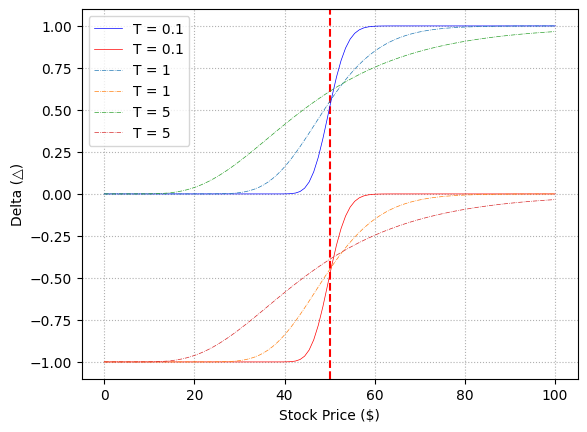

In [21]:
plt.axvline(K, color='r', linestyle='--');

plt.plot(S, Delta(S, K, r, sigma, 0.1, 'C').delta(), 'b', lw=0.5, label="T = 0.1");
plt.plot(S, Delta(S, K, r, sigma, 0.1, 'P').delta(), 'r', lw=0.5, label="T = 0.1");

for T in [1, 5]:    
    plt.plot(S, Delta(S, K, r, sigma, T, 'C').delta(), lw=0.5, ls='-.', label="T = {}".format(T));
    plt.plot(S, Delta(S, K, r, sigma, T, 'P').delta(), lw=0.5, ls='-.', label="T = {}".format(T));
    
plt.xlabel("Stock Price ($)");
plt.ylabel("Delta (△)");
plt.legend()
plt.grid(True, ls='dotted');

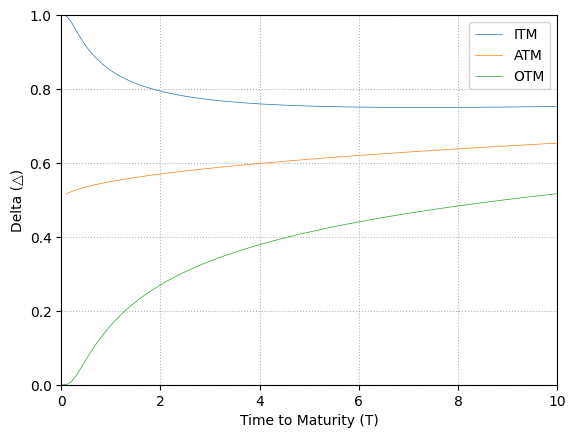

In [48]:
ITM, ATM, OTM = 60, 50, 40
T = np.linspace(0, 10, 101)

plt.plot(T, Delta(ITM, K, r, sigma, T, 'C').delta(), lw=0.5, label="ITM");
plt.plot(T, Delta(ATM, K, r, sigma, T, 'C').delta(), lw=0.5, label="ATM");
plt.plot(T, Delta(OTM, K, r, sigma, T, 'C').delta(), lw=0.5, label="OTM");
    
plt.xlabel("Time to Maturity (T)");
plt.xlim([0,10]);
plt.ylim([0,1]);
plt.ylabel("Delta (△)");
plt.legend()
plt.grid(True, ls='dotted');

## $\triangle_p = \frac{\partial \Pi}{\partial S} = \sum_{i=1}^{n} w_i \triangle_i$

# Gamma ($\Gamma$)

### $\Gamma = \frac{\partial^2C}{\partial S_0^2} \hspace{0.3cm} $ or $ \hspace{0.3cm} \Gamma = \frac{\partial^2\Pi}{\partial S_0^2}$

Recall that $\triangle_{put} = \triangle_{call} - 1$  

$\implies \frac{\partial \triangle_{put}}{S_0} = \frac{\partial \triangle_{call}}{S_0} - 0$  

$\therefore \Gamma_p =  \Gamma_c = \frac{e^{-\frac {d_1^2}{2}}}{\sigma S_0 \sqrt{2 \pi T}} = \frac{\phi (d_1)}{S_0 \sigma \sqrt{T}}$

In [29]:
def gamma(S, K, r, sigma, T):    
    d1 = (np.log(S/K) + (r+(sigma**2/2))*T) / (sigma*np.sqrt(T))
    
    return np.exp(-d1**2/2)/ sigma / S/ np.sqrt(2*np.pi*T)

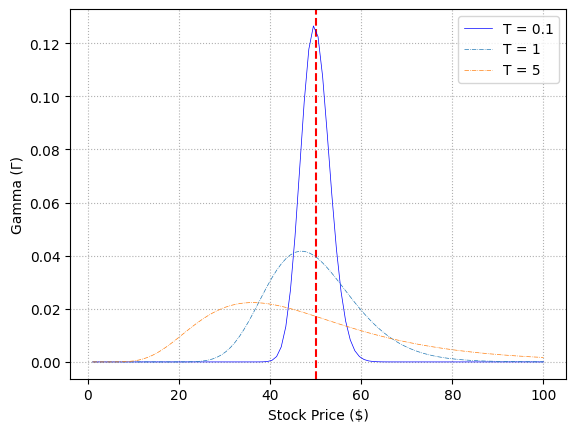

In [31]:
plt.axvline(K, color='r', linestyle='--');
plt.plot(S, gamma(S, K, r, sigma, 0.1), 'b', lw=0.5, label="T = 0.1");

for T in [1, 5]:    
    plt.plot(S, gamma(S, K, r, sigma, T), lw=0.5, ls='-.', label="T = {}".format(T));
    
plt.xlabel("Stock Price ($)");
plt.ylabel("Gamma (Γ)");
plt.legend()
plt.grid(True, ls='dotted');

$\triangle \Pi = \Theta \hspace{0.1cm} \triangle t + \frac{1}{2} \Gamma \hspace{0.1cm} \triangle S^2$

Given that the portfolio value is $\Pi(t, S, \sigma)$  

#### Taylor Series Expansion of the change in portfolio value in a short period of time shows the role played by different Greek letter

### $\delta \Pi = \frac{\partial \Pi}{\partial S} \delta S + \frac{\partial \Pi}{\partial \sigma} \delta \sigma + \frac{\partial \Pi}{\partial t} \delta t + \frac {1}{2}\frac{\partial^2 \Pi}{\partial S^2} \delta S^2 + \frac {1}{2}\frac{\partial^2 \Pi}{\partial \sigma^2} \delta \sigma^2 + ... $

where terms of order higher than $\delta t$ are ignored (recall Box calculus)

## $\implies \delta \Pi = \triangle \delta S + \nu \delta \sigma + \Theta \delta t + \frac {1}{2} \Gamma \delta S^2 + \frac {1}{2}\frac{\partial^2 \Pi}{\partial \sigma^2} \delta \sigma^2 + ... $


$\delta \Pi = \triangle \delta S + \nu \delta \sigma + \Theta \delta t + \frac {1}{2} \Gamma \delta S^2 + \frac {1}{2}\frac{\partial^2 \Pi}{\partial \sigma^2} \delta \sigma^2 + ... $

### $\delta \Pi \approx \Theta \delta t + \frac {1}{2} \Gamma \delta S^2 $

$\Gamma-neutral: w_T \Gamma_T + \Gamma = 0, \hspace{0.3cm}$where $w_T $ is the number of traded options to be added to the portfolio  

$\implies w_T = -\frac{\Gamma}{\Gamma_T}$

$\therefore \triangle_p = (\triangle * w_T) $ is the number of underlying needed to be sold from the portfolio to keep it Delta-Neutral

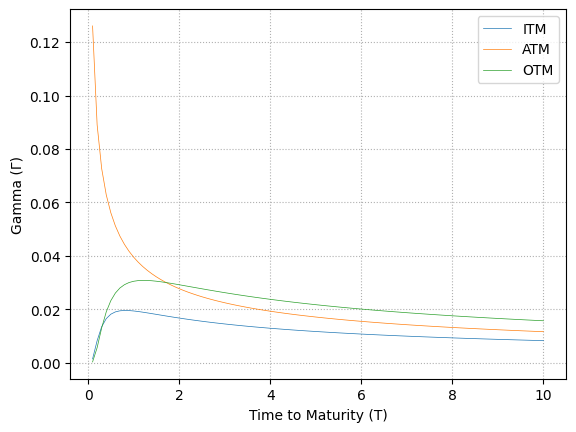

In [71]:
ITM, ATM, OTM = 60, 50, 40
T = np.linspace(0, 10, 101)

plt.plot(T, gamma(ITM, K, r, sigma, T), lw=0.5, label="ITM");
plt.plot(T, gamma(ATM, K, r, sigma, T), lw=0.5, label="ATM");
plt.plot(T, gamma(OTM, K, r, sigma, T), lw=0.5, label="OTM");
    
plt.xlabel("Time to Maturity (T)");
plt.ylabel("Gamma (Γ)");

plt.legend()
plt.grid(True, ls='dotted');

# Vega ($\nu$)

## $\frac{\partial C}{\partial \sigma} = \frac{\partial P}{\partial \sigma} = \frac{S_0 \sqrt{T}}{\sqrt{2\pi}} e^{-\frac{d_1^2}{2}} = S_0 \sqrt{T} \phi(d_1)$ 

- Using Put-Call Parity, we can show that call and put options have identical vega

In [22]:
def vega(S, K, r, sigma, T):    
    d1 = (np.log(S/K) + (r+(sigma**2/2))*T) / (sigma*np.sqrt(T))
    
    return S*np.sqrt(T)/np.sqrt(2*np.pi) * np.exp(-d1**2/2)

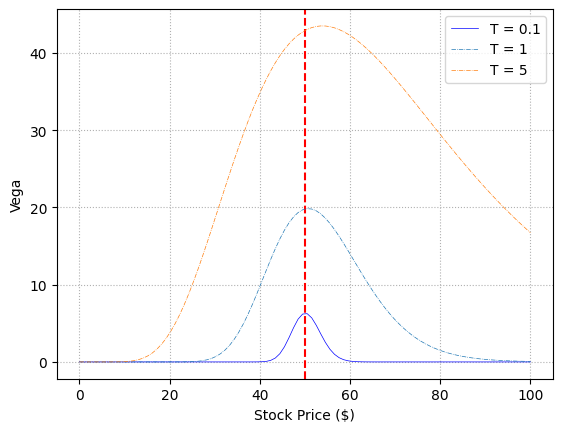

In [26]:
plt.axvline(K, color='r', linestyle='--');
plt.plot(S, vega(S, K, r, sigma, 0.1), 'b', lw=0.5, label="T = 0.1");

for T in [1, 5]:    
    plt.plot(S, vega(S, K, r, sigma, T), lw=0.5, ls='-.', label="T = {}".format(T));
    
plt.xlabel("Stock Price ($)");
plt.ylabel("Vega");
plt.legend()
plt.grid(True, ls='dotted');

$\nu-neutral: w_T \nu_T + \nu = 0, \hspace{0.3cm}$where $w_T $ is the number of traded options to be added to the portfolio  

$\implies w_T = -\frac{\nu}{\nu_T}$

# Theta ($\Theta$)

### $\Theta_c = -\frac{S_0 \phi(d_1) \sigma}{2 \sqrt{T}} - r K e^{-rT} \Phi(d_2) \hspace{0.3cm}$ and $\hspace{0.3cm} \Theta_p = -\frac{S_0 \phi(d_1) \sigma}{2 \sqrt{T}} + r K e^{-rT} \Phi(-d_2)$

We know that $\Phi(-x) = 1 - \Phi(x)$ due to symmetry in a standard normal CDF. 

$\implies \Theta_p = -\frac{S_0 \phi(d_1) \sigma}{2 \sqrt{T}} + r K e^{-rT} (1 - \Phi(d_2)) = [-\frac{S_0 \phi(d_1) \sigma}{2 \sqrt{T}} - r K e^{-rT}\Phi(d_2)] + r K e^{-rT} $  
### $\therefore \Theta_p = \Theta_c + r K e^{-rT} $

In [51]:
def theta(S, K, r, sigma, T):    
    d1 = (np.log(S/K) + (r+(sigma**2/2))*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    call = -((S*norm.pdf(d1)*sigma)/(2*np.sqrt(T))) - (r*K*np.exp(-r*T)*norm.cdf(d2))
    put = call + r*K*np.exp(-r*T)
    
    return [call, put]

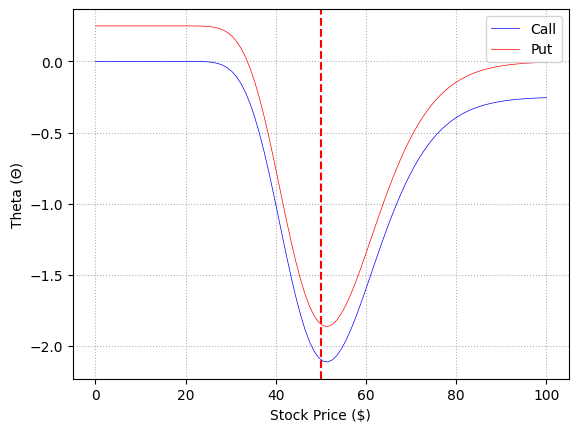

In [55]:
plt.axvline(K, color='r', linestyle='--');

plt.plot(S, theta(S, K, r, sigma,1)[0], 'b', lw=0.5, label="Call");
plt.plot(S, theta(S, K, r, sigma, 1)[1], 'r', lw=0.5, label="Put");
    
plt.xlabel("Stock Price ($)");
plt.ylabel("Theta (Θ)");
plt.legend()
plt.grid(True, ls='dotted');

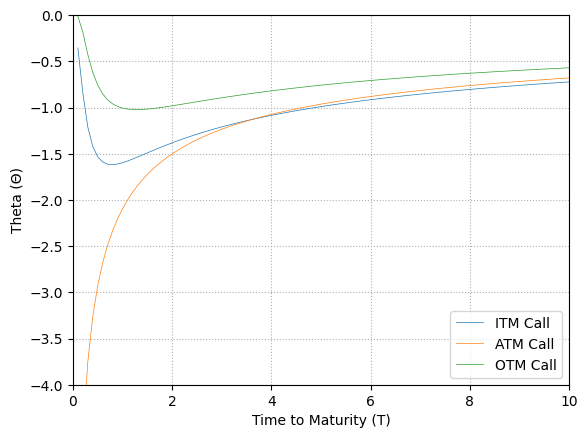

In [66]:
ITM, ATM, OTM = 60, 50, 40
T = np.linspace(0, 10, 101)

plt.plot(T, theta(ITM, K, r, sigma, T)[0], lw=0.5, label="ITM Call");
plt.plot(T, theta(ATM, K, r, sigma, T)[0], lw=0.5, label="ATM Call");
plt.plot(T, theta(OTM, K, r, sigma, T)[0], lw=0.5, label="OTM Call");
    
plt.xlabel("Time to Maturity (T)");
plt.ylabel("Theta (Θ)");
plt.xlim([0,10]);
plt.ylim([-4,0])
plt.legend()
plt.grid(True, ls='dotted');

# Rho ($\rho$)

### $\rho = \frac{\partial \Pi}{\partial r}$ 

$\rho_c = KTe^{-rT} \Phi(d_2) \hspace{0.3cm}$ and $\hspace{0.3cm} \rho_p = -KTe^{-rT} \Phi(-d_2)$ 

$\rho_p = -KTe^{-rT} (1 - \Phi(d_2)) = \rho_c - KTe^{-rT}$ 

# Black-Scholes PDE

### $r\Pi = rS \frac{\partial \Pi}{\partial S} + \frac{\partial \Pi}{\partial t} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 \Pi}{\partial S^2} \hspace{0.3cm} \equiv \hspace{0.3cm} r\Pi = rS \triangle + \Theta + \frac{1}{2} \sigma^2 S^2 \Gamma$ 



For $\triangle$-neutral portfolio, $\triangle = 0 \implies r\Pi = \Theta + \frac{1}{2} \sigma^2 S^2 \Gamma$ 